In [2]:
import os
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib as plt
import json
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOAD DATAFRAME

In [3]:
df = pd.read_csv(r"medical_insurance.csv")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


SOME INFORMATION ABOUT DATASET

In [4]:
df.info()    #we found some object datatype we need to convert it to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()   #some statistical analysis

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isna().sum() #there is no null values in the dataset

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

In [8]:
df.drop_duplicates(inplace=True)
df.shape      #found only one duplicate and deleted it.

(1337, 7)

WE WILL DO INDIVIDUAL FEATURE ANALYSIS

In [9]:
#AGE
df['age'].isnull().sum()

0

In [10]:
df['age'].info()    #every value is in int

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: age
Non-Null Count  Dtype
--------------  -----
1337 non-null   int64
dtypes: int64(1)
memory usage: 20.9 KB


<Axes: >

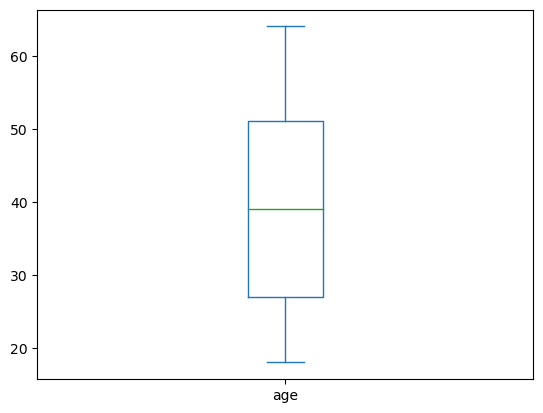

In [11]:
df['age'].plot(kind='box')    #some outliers are there, but we will check with another methods as well.

In [12]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower:',lower_bound,"\n","Upper:",upper_bound)

Lower: -9.0 
 Upper: 87.0


In [13]:
#GENDER
df['gender'].info() #in obj

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
1337 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


In [14]:
df['gender'].value_counts()    #2 classes

male      675
female    662
Name: gender, dtype: int64

In [15]:
df['gender'].value_counts().to_dict()

{'male': 675, 'female': 662}

In [16]:
df['gender'].replace({'male': 0, 'female': 1}, inplace = True)

In [17]:
df['gender'].value_counts()

0    675
1    662
Name: gender, dtype: int64

In [18]:
# BMI
df['bmi'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [19]:
df['bmi'].isnull().sum()

0

In [20]:
#CHILDREN
df['children'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: children
Non-Null Count  Dtype
--------------  -----
1337 non-null   int64
dtypes: int64(1)
memory usage: 20.9 KB


In [21]:
df['children'].isna().sum()

0

In [22]:
# SMOKER
df['smoker'].info()   #in obj

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: smoker
Non-Null Count  Dtype 
--------------  ----- 
1337 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


In [23]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [24]:
df['smoker'].value_counts().to_dict()

{'no': 1063, 'yes': 274}

In [25]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace = True)
df['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [26]:
#RELIGION
df['region'].info()  #obj

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: region
Non-Null Count  Dtype 
--------------  ----- 
1337 non-null   object
dtypes: object(1)
memory usage: 20.9+ KB


In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [28]:
df = pd.get_dummies(df, columns=['region'], prefix="", prefix_sep="")

In [29]:
df

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [30]:
#CHARGES
df['charges'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1337 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [31]:
df["charges"].isnull().sum()

0

MODEL TRAINING

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [33]:
x = df.drop(['charges'],axis =1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=22)

In [34]:
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [35]:
print('R2',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_test,y_pred_lr))
print("MSE",mean_squared_error(y_test,y_pred_lr))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_lr)))

R2 0.745656725673611
MAE 4311.091691964787
MSE 40624561.03591229
RMSE 6373.739956721822


In [36]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

In [37]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)

In [38]:
print('R2',r2_score(y_test,y_pred_knn))
print('MAE',mean_absolute_error(y_test,y_pred_knn))
print("MSE",mean_squared_error(y_test,y_pred_knn))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_knn)))

R2 0.12225182544481317
MAE 8152.423611791793
MSE 140196883.07393202
RMSE 11840.476471575459


In [39]:
pd.DataFrame({"actual":y_test,"predicted":y_pred_knn})

,actual,predicted
1231,20167.33603,9377.969460
769,6933.24225,8468.202580
847,2438.05520,17942.121540
510,11763.00090,19383.828994
363,2597.77900,8141.638570
...,...,...
880,3443.06400,3599.682120
1039,22493.65964,11475.108952
874,8891.13950,13281.665830
758,5428.72770,11809.373090


In [40]:
# DT
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [42]:
print('R2',r2_score(y_test,y_pred_dt))
print('MAE',mean_absolute_error(y_test,y_pred_dt))
print("MSE",mean_squared_error(y_test,y_pred_dt))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_dt)))

R2 0.6704176746296124
MAE 3652.769234365672
MSE 52641994.67757675
RMSE 7255.480320252875


In [43]:
#RF
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [45]:
print('R2',r2_score(y_test,y_pred_rf))
print('MAE',mean_absolute_error(y_test,y_pred_rf))
print("MSE",mean_squared_error(y_test,y_pred_rf))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 0.8254719647682971
MAE 3049.5683392515675
MSE 27876203.286781933
RMSE 5279.791973816955


In [46]:
#ADA
from sklearn.ensemble import AdaBoostRegressor

In [47]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

In [48]:
print('R2',r2_score(y_test,y_pred_ada))
print('MAE',mean_absolute_error(y_test,y_pred_ada))
print("MSE",mean_squared_error(y_test,y_pred_ada))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_ada)))

R2 0.8086321324343447
MAE 4299.182440301481
MSE 30565917.800747354
RMSE 5528.645204817121


In [49]:
# GB
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

In [51]:
print('R2',r2_score(y_test,y_pred_gb))
print('MAE',mean_absolute_error(y_test,y_pred_gb))
print("MSE",mean_squared_error(y_test,y_pred_gb))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_gb)))

R2 0.8449105406498992
MAE 2765.60761239282
MSE 24771408.735226434
RMSE 4977.0883792862705


In [52]:
# XGB
from xgboost import XGBRegressor

In [53]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [54]:
print('R2',r2_score(y_test,y_pred_xgb))
print('MAE',mean_absolute_error(y_test,y_pred_xgb))
print("MSE",mean_squared_error(y_test,y_pred_xgb))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

R2 0.7982217162725181
MAE 3394.5116358702703
MSE 32228704.394556224
RMSE 5677.033062661889


HYPER PARAMETER TUNNING

In [55]:
#KNN
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_knn = {
    'n_neighbors' : [1,3,5,7],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

In [56]:
knn_rscv = RandomizedSearchCV(estimator=KNN, param_distributions=param_knn,random_state=42)
knn_rscv.fit(x_train, y_train)
knn_rscv.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 7}

In [57]:
knn1 = KNeighborsRegressor(**knn_rscv.best_params_)
knn1.fit(x_train, y_train)
new_knn = knn1.predict(x_test)

In [58]:
print('R2',r2_score(y_test,new_knn))
print('MAE',mean_absolute_error(y_test,new_knn))
print("MSE",mean_squared_error(y_test,new_knn))
print('RMSE', np.sqrt(mean_squared_error(y_test,new_knn)))

R2 0.2648821752110132
MAE 7160.226131214387
MSE 117415485.11876175
RMSE 10835.842612310395


In [59]:
#DT
param_dt = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt']
}

In [60]:
dt_rscv = RandomizedSearchCV(estimator=dt, param_distributions=param_dt, random_state=22)
dt_rscv.fit(x_train, y_train)
dt_rscv.best_params_

c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  war

{'min_samples_split': 19,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4}

In [61]:
dt1 = DecisionTreeRegressor(**dt_rscv.best_params_)
dt1.fit(x_train, y_train)
new_dt = dt1.predict(x_test)

c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [62]:
print('R2',r2_score(y_test,new_dt))
print('MAE',mean_absolute_error(y_test,new_dt))
print("MSE",mean_squared_error(y_test,new_dt))
print('RMSE', np.sqrt(mean_squared_error(y_test,new_dt)))

R2 0.8400013558441187
MAE 2914.979631231005
MSE 25555520.20153978
RMSE 5055.246799271009


In [63]:
# RF
param_rf = {
    'n_estimators' : [10,20,30],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt']
}

In [64]:
rf_rscv = RandomizedSearchCV(rf, param_distributions=param_rf,random_state=22)
rf_rscv.fit(x_train, y_train)
rf_rscv.best_params_

c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 12}

In [65]:
rf1 = RandomForestRegressor(**rf_rscv.best_params_)
rf1.fit(x_train, y_train)
new_rf = rf_rscv.predict(x_test)

c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [66]:
print('R2',r2_score(y_test,new_rf))
print('MAE',mean_absolute_error(y_test,new_rf))
print("MSE",mean_squared_error(y_test,new_rf))
print('RMSE', np.sqrt(mean_squared_error(y_test,new_rf)))

R2 0.8458247476870973
MAE 2870.10262144072
MSE 24625388.520300478
RMSE 4962.397456905329


In [67]:
# ADA
param_ada = {
    'n_estimators': np.arange(50, 200),
    'learning_rate': np.linspace(0.01, 0.5, num=10)
}

In [68]:
ada_rscv = RandomizedSearchCV(ada, param_ada)
ada_rscv.fit(x_train, y_train)
ada_rscv.best_params_

{'n_estimators': 53, 'learning_rate': 0.22777777777777777}

In [69]:
ada1 = AdaBoostRegressor(**ada_rscv.best_params_)
ada1.fit(x_train, y_train)
new_ada = ada1.predict(x_test)

In [70]:
print('R2',r2_score(y_test,new_ada))
print('MAE',mean_absolute_error(y_test,new_ada))
print("MSE",mean_squared_error(y_test,new_ada))
print('RMSE', np.sqrt(mean_squared_error(y_test,new_ada)))

R2 0.8185259982810527
MAE 4211.446314989706
MSE 28985636.356171273
RMSE 5383.8310111082865


In [71]:
#GB
param_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    # Add more hyperparameters if needed
}

In [72]:
random_search = RandomizedSearchCV(gb, param_distributions=param_gb)
random_search.fit(x_train, y_train)
random_search.best_params_


{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}

In [73]:
gb1 = GradientBoostingRegressor(**random_search.best_params_)
gb1.fit(x_train, y_train)
new_gb = gb1.predict(x_test)

In [74]:
print('R2',r2_score(y_test,new_gb))
print('MAE',mean_absolute_error(y_test,new_gb))
print("MSE",mean_squared_error(y_test,new_gb))
print('RMSE', np.sqrt(mean_squared_error(y_test,new_gb)))

R2 0.8424617359679436
MAE 2998.9346541845794
MSE 25162540.034179013
RMSE 5016.22766969154


In [75]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(gb1,f)

In [76]:
x

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [77]:
json_data = {'gender' : {'male': 0, 'female': 1},
               'smoker' : {'no': 0, 'yes': 1},
               'columns' : list(x.columns)}

with open(r'json_data.json','w') as f:
    json.dump(json_data,f)
    

In [78]:
test_array = np.zeros(9,dtype=int)
age = 61
gender = 'female'
bmi = 28.4
children = 1
smoker = 'yes'
region = 'southwest'

test_array[0] = age
test_array[1] = json_data['gender'][gender]
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker'][smoker]
test_array[json_data['columns'].index(region)] = 1

round(gb1.predict([test_array])[0],0)


c:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


26818.0